In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, date
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
from datetime import datetime
import re

In [ ]:
file_path = "/content/netflix_titles.csv"
da = pd.read_csv(file_path, index_col="show_id")

In [ ]:
da

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...
s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...


In [ ]:
list(da.columns)

['type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description']

In [ ]:
da.nunique()

,0
type,2
title,8807
director,4528
cast,7692
country,748
date_added,1767
release_year,74
rating,17
duration,220
listed_in,514


In [ ]:
da.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, s1 to s8807
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      6173 non-null   object
 3   cast          7982 non-null   object
 4   country       7976 non-null   object
 5   date_added    8797 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8803 non-null   object
 8   duration      8804 non-null   object
 9   listed_in     8807 non-null   object
 10  description   8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 825.7+ KB


In [ ]:
da.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
da['date_added'] = pd.to_datetime(da['date_added'], format = "%B %d, %Y", errors = 'coerce')

In [ ]:
original_dates = da['date_added'].copy()
invalid_dates = original_dates[~pd.to_datetime(original_dates, format="%B %d, %Y", errors='coerce').notna()]
print("Некорректные даты:\n", invalid_dates)

Некорректные даты:
 show_id
s6067   NaT
s6080   NaT
s6175   NaT
s6178   NaT
s6214   NaT
         ..
s8540   NaT
s8558   NaT
s8685   NaT
s8713   NaT
s8756   NaT
Name: date_added, Length: 98, dtype: datetime64[ns]


In [ ]:
da.isna().sum()

,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3
listed_in,0


In [ ]:
df = da.dropna()

In [ ]:
df

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
...,...,...,...,...,...,...,...,...,...,...,...
s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...


In [ ]:
df.isna().sum()

,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0
listed_in,0


In [ ]:
def extract_duration(value):
  numbers = re.findall(r'\d+', value) # находим все числа в строке
  if numbers:
    return int(numbers[0]) # возврат числа как целое
  return 0

In [ ]:
df['duration_num'] = df['duration'].apply(extract_duration)
x_values = df['date_added']
y_values = df['duration_num']
color_values = df['duration_num']

fig = go.Figure(data = [
    go.Bar(
        x = x_values,
        y = y_values,
        marker = dict(
            color = color_values,
            coloraxis = "coloraxis",
            line = dict(color = 'black', width = 2),
        )
    )
])

fig.update_layout(
    title = 'Диаграмма',
    title_x = 0.5,
    title_font_size=20,
    xaxis_title='Дата',
    yaxis_title='Количество',
    xaxis_tickangle=-45,  # Разворот меток оси X на 315 градусов
    xaxis_tickfont=dict(size=14),
    yaxis_tickfont=dict(size=14),
    height=700,  # Высота графика
    width=1500,  # Ширина графика
    margin=dict(l=10, r=10, t=40, b=10),  # Убираем лишние отступы
    coloraxis=dict(colorscale='Viridis'),  # Пример цветовой шкалы
)

<ipython-input-9-7b0291fa9089>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration_num'] = df['duration'].apply(extract_duration)


In [ ]:
rating_counts = df['rating'].value_counts()

pie_fig = go.Figure(data = [go.Pie(
    labels=rating_counts.index,
    values=rating_counts.values,
    marker=dict(line=dict(color='black', width=2))
)])

pie_fig.update_layout(
    title='Круговая диаграмма по рейтингам',
    title_x=0.5,
    title_font_size=20
)

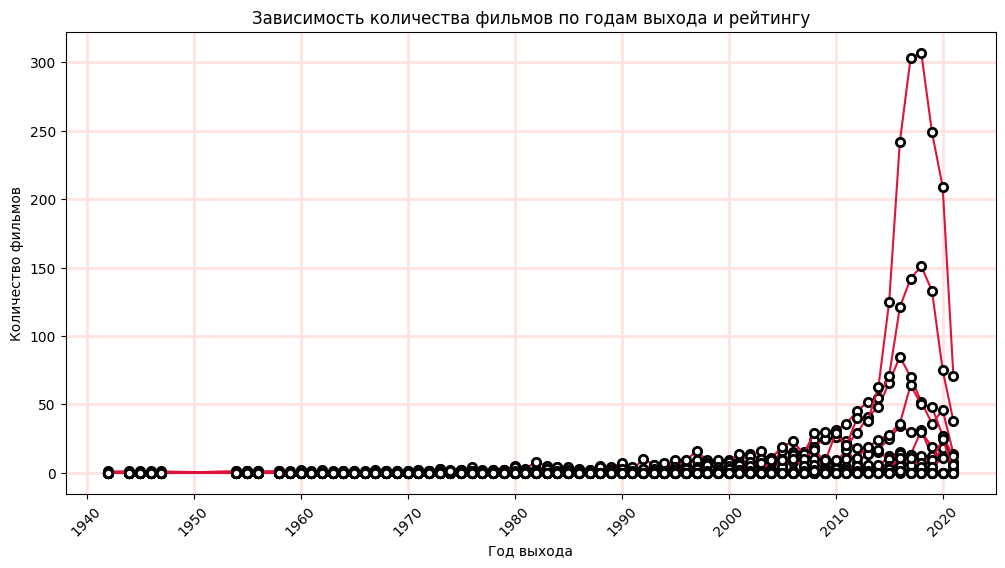

In [ ]:
rating_counts = df.groupby(['release_year', 'rating']).size().unstack(fill_value=0)

# Построение графика
plt.figure(figsize=(12, 6))

# Настройка цвета линии и маркеров
colors = ['crimson'] * rating_counts.shape[1]

for rating in rating_counts.columns:
    plt.plot(rating_counts.index, rating_counts[rating],
             marker = 'o',
             color = 'crimson',
             label = rating,
             markerfacecolor = 'white',
             markeredgecolor = 'black',
             markeredgewidth = 2
             )

# Заголовки и метки
plt.title('Зависимость количества фильмов по годам выхода и рейтингу')
plt.xlabel('Год выхода')
plt.ylabel('Количество фильмов')
plt.xticks(rotation = 45)

# Настройка сетки
plt.grid(color= 'mistyrose', linewidth=2)

# Показать график
plt.show()

In [ ]:
pip install numpy matplotlib scikit-learn tensorflow

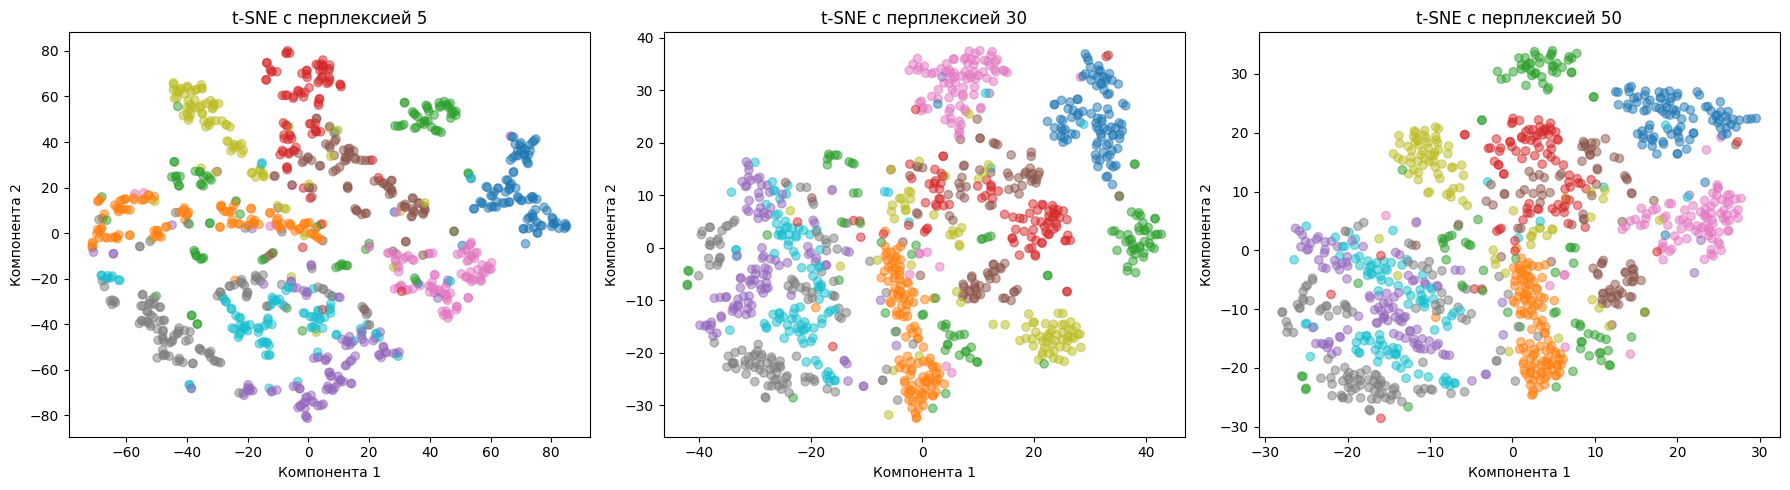

In [ ]:
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_openml

# Загрузка данных MNIST
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target.astype(int)

# Снижение размерности с t-SNE для разных значений перплексии
perplexities = [5, 30, 50]

plt.figure(figsize=(18, 5))

for i, perplexity in enumerate(perplexities):
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(X[:1000])  # Используем 1000 образцов для ускорения
    plt.subplot(1, len(perplexities), i + 1)
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y[:1000], cmap='tab10', alpha=0.5)
    plt.title(f't-SNE с перплексией {perplexity}')
    plt.xlabel('Компонента 1')
    plt.ylabel('Компонента 2')

plt.tight_layout()
plt.show()

In [ ]:
pip install numpy matplotlib scikit-learn umap-learn tensorflow

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



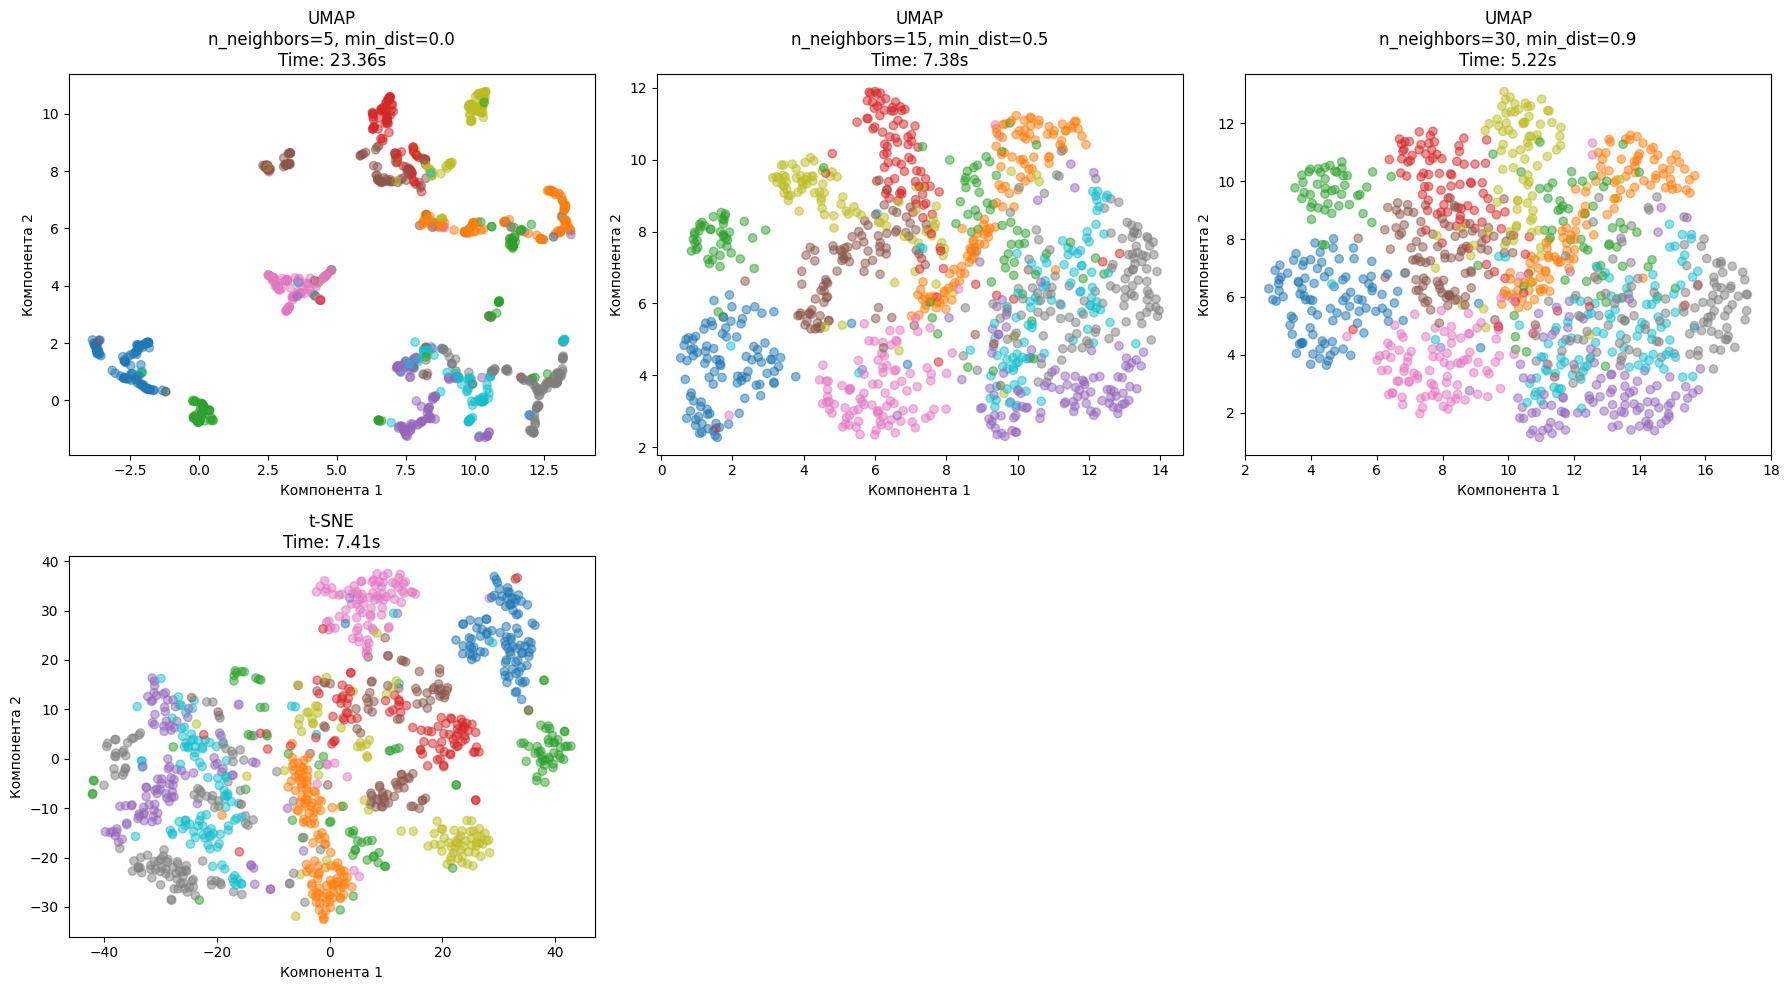

In [ ]:
import time
from sklearn.datasets import fetch_openml
import umap
from sklearn.manifold import TSNE

# Загрузка данных MNIST
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target.astype(int)

# Определение параметров
n_neighbors_list = [5, 15, 30]
min_dist_list = [0.0, 0.5, 0.9]

# Функция для выполнения t-SNE
def run_tsne(X, perplexity):
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    return tsne.fit_transform(X)

# Визуализация UMAP
plt.figure(figsize=(18, 10))
for i, (n_neighbors, min_dist) in enumerate(zip(n_neighbors_list, min_dist_list)):
    start_time = time.time()
    umap_model = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, random_state=42)
    X_umap = umap_model.fit_transform(X[:1000])  # Используем 1000 образцов для ускорения
    elapsed_time = time.time() - start_time

    plt.subplot(2, 3, i + 1)
    plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y[:1000], cmap='tab10', alpha=0.5)
    plt.title(f'UMAP\nn_neighbors={n_neighbors}, min_dist={min_dist}\nTime: {elapsed_time:.2f}s')
    plt.xlabel('Компонента 1')
    plt.ylabel('Компонента 2')

# Выполнение t-SNE
plt.subplot(2, 3, 4)
start_time_tsne = time.time()
X_tsne = run_tsne(X[:1000], perplexity=30)
elapsed_time_tsne = time.time() - start_time_tsne

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y[:1000], cmap='tab10', alpha=0.5)
plt.title(f't-SNE\nTime: {elapsed_time_tsne:.2f}s')
plt.xlabel('Компонента 1')
plt.ylabel('Компонента 2')

plt.tight_layout()
plt.show()